# EDA for Signal

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler.py')
)

os.chdir(path)
sys.path.append(path)

In [2]:
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from matplotlib import pyplot as plt

In [3]:
dataset = Dataset('signal')
dataframe = dataset.load()

In [4]:
folders = dataframe.folder.unique()

In [5]:
def get_recording_count(dataframe):
    recordings = []
    
    for folder in folders:
        subset = dataframe[dataframe.folder == folder]

        recordings.append(
            len(
                subset.filename.unique()
            )
        )

    return recordings

In [6]:
def get_recording_mean_duration(dataframe):
    durations = []
    
    for folder in folders:
        subset = dataframe[dataframe.folder == folder]
        
        duration = (
            subset
            .groupby('filename')
            .first()
            .signal
            .apply(lambda s: s.duration)
            .to_numpy()
            .mean()
        )

        durations.append(duration)

    return durations

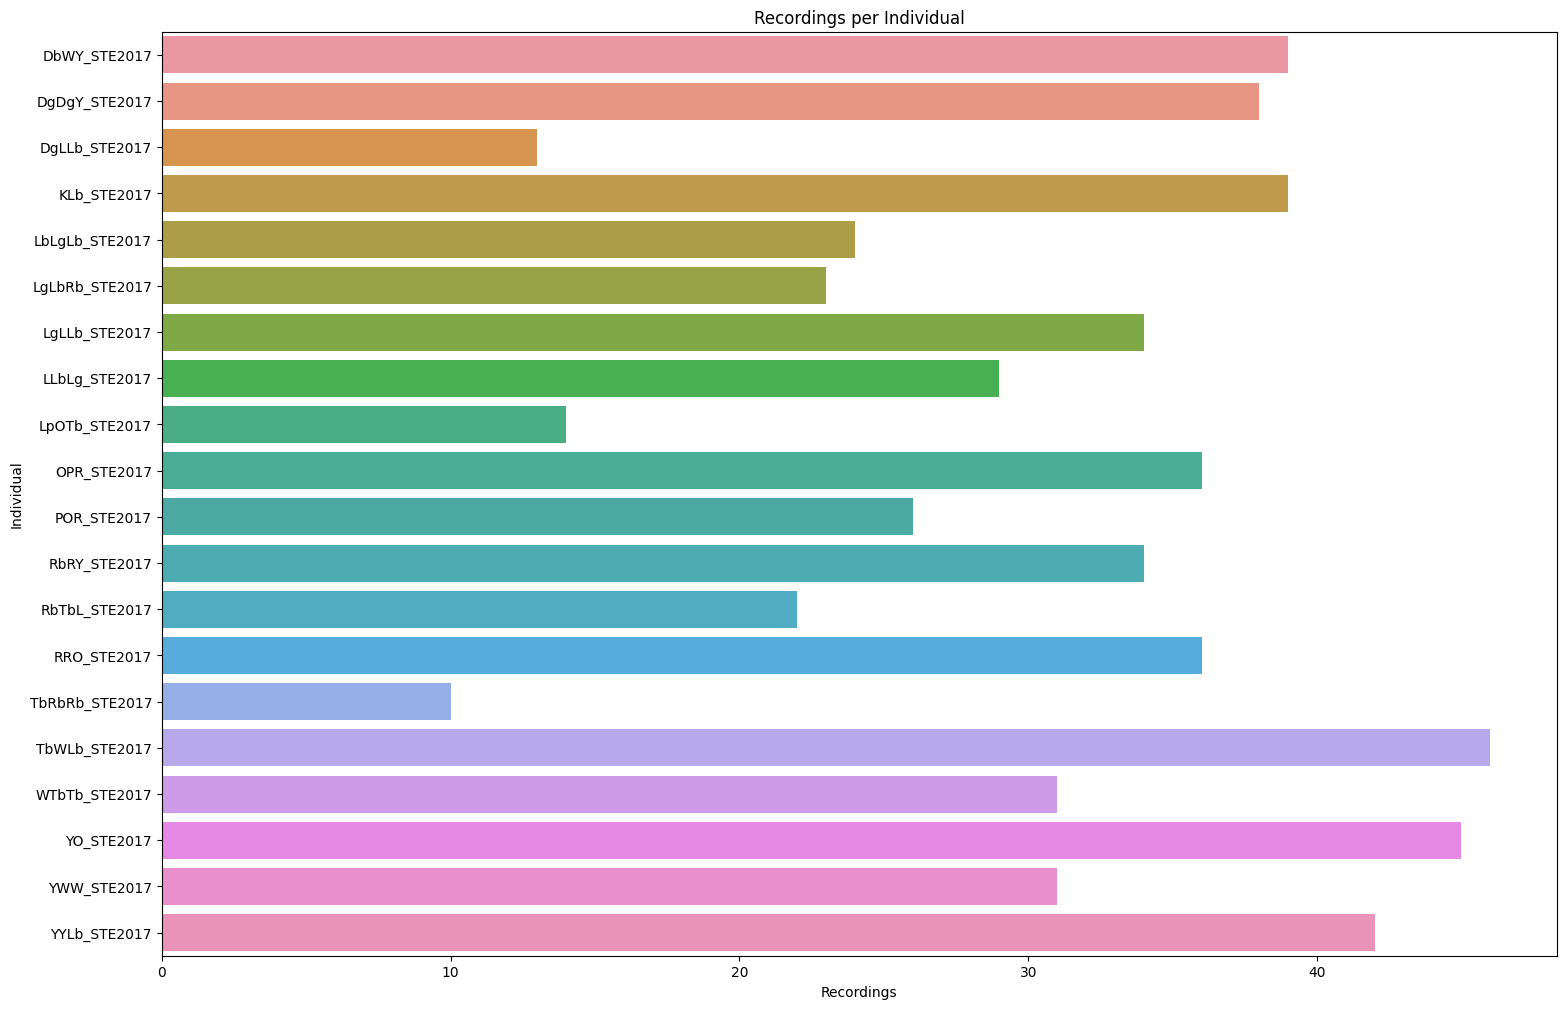

In [7]:
recordings = get_recording_count(dataframe)

fig, ax = plt.subplots(
    figsize=(18, 12)
)

ax.set_title('Recordings per Individual')
ax.set_xlabel('Recordings')
ax.set_ylabel('Individual')

sns.barplot(x=recordings, y=folders, orient='h')

filename = 'signal_recordings_per_individual.png'
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.show()
plt.close()

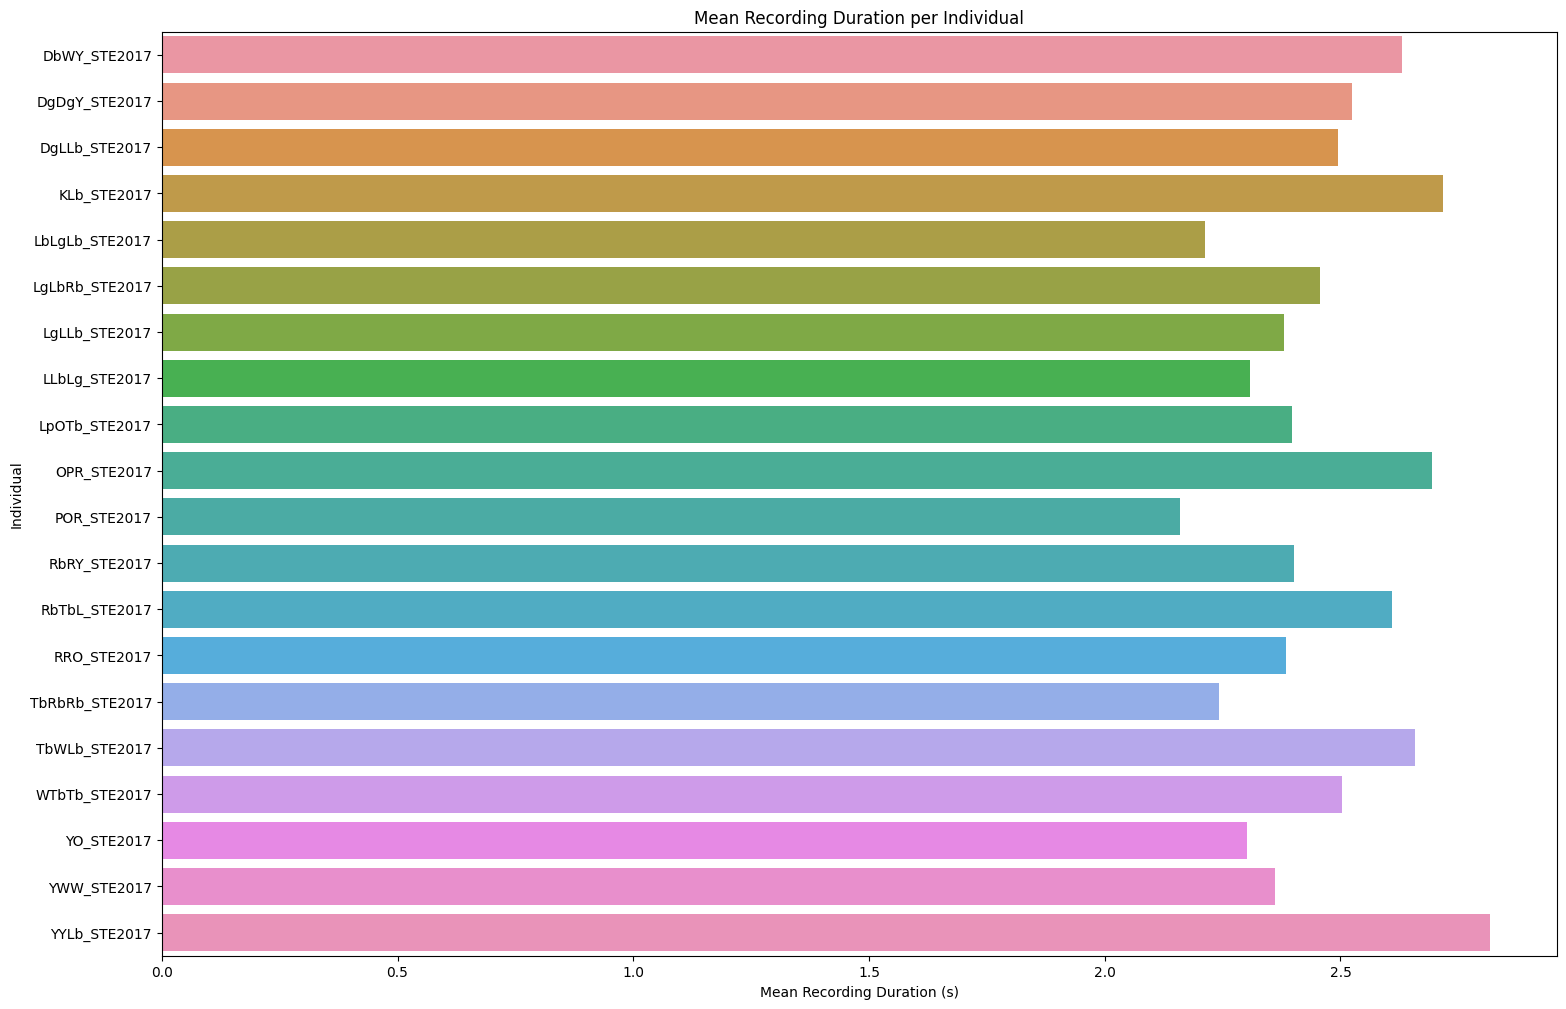

In [8]:
durations = get_recording_mean_duration(dataframe)

fig, ax = plt.subplots(
    figsize=(18, 12)
)

ax.set_title('Mean Recording Duration per Individual')
ax.set_xlabel('Mean Recording Duration (s)')
ax.set_ylabel('Individual')

sns.barplot(x=durations, y=folders, orient='h')

filename = 'signal_mean_recording_duration_individual.png'
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

plt.show()
plt.close()